In [16]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## .merge()

### Example 1

In [3]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}


df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

In [4]:
df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


In [5]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [6]:
df_job_company = df_jobs.merge(df_companies, on='company_name')

df_job_company

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


### Example 2

In [7]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot = df_US_pivot.reset_index()
df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot = df_US_pivot.sort_values('job_posted_month_no')
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot = df_US_pivot.drop(columns='job_posted_month_no')

df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [8]:
pd.read_csv('https://lukeb.co/software_csv')
#this one has the numbers as index but the other had the monthd as the index

,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,13619,9827,5108,4348
1,February,11456,9116,7298,4284
2,March,11102,8178,5814,4159
3,April,14037,9209,7232,4220
4,May,12126,8864,6718,4980
5,June,12003,8065,5902,4781
6,July,11914,8061,6839,4344
7,August,11571,8191,7413,4104
8,September,14016,8447,6139,4094
9,October,11419,8476,5026,4389


In [9]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')
df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [10]:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')
df_US_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [11]:
top_5 = df_US_merged.sum().sort_values(ascending=False).head(5).index.to_list()
top_5
#.head() is automatically 5, so dont have to type 5 in the ()

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

In [12]:
#code can aslo be written like this:
#wrap it in ()
top_5 = (
    df_US_merged    #comments can be written as well
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
    .to_list()
)

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

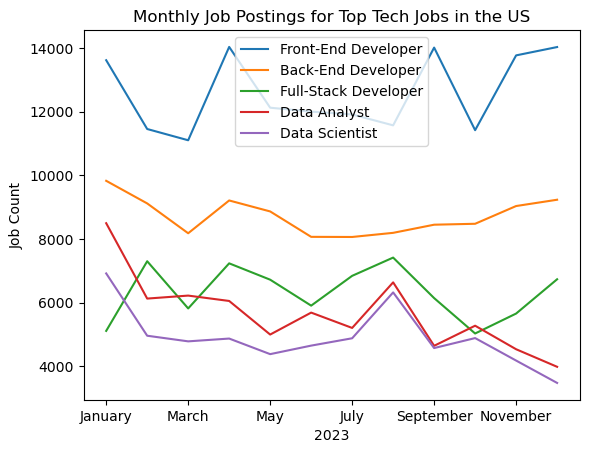

In [13]:
df_US_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

---

## Course Practice Problemss

- Create a DataFrame df_us_jobs that contains job postings in the United States.
- Then create another DataFrame df_monthly_postings that counts the number of job postings for each month.
- Merge these two DataFrames on the job_posted_month column using a right join and display the first 5 rows of the resulting DataFrame. 

(2.7.1)

    Filter the DataFrame first then use the groupby() method to count the number of job postings for each month. Then use the merge() function to combine the DataFrames on the job_posted_month column.

In [ ]:
df_us_jobs = df[df['job_country']=='United States'].copy()
df_us_jobs['job_posted_month'] = df_us_jobs['job_posted_date'].dt.strftime('%B')
df_monthly_postings = df_us_jobs.groupby('job_posted_month').size().reset_index(name='postings_count')
job_posted_month = df_us_jobs.merge(df_monthly_postings, on='job_posted_month', how='right')
job_posted_month.head()


In [15]:
df_us_jobs = df[df['job_country']=='United States'].copy()

In [36]:
df_us_jobs['job_posted_month'] = df_us_jobs['job_posted_date'].dt.strftime('%B')
df_monthly_postings = df_us_jobs.groupby('job_posted_month').size().reset_index(name='postings_count')

In [ ]:
job_posted_month = df_us_jobs.merge(df_monthly_postings, on='job_posted_month', how='right')
#job_posted_month = pd.merge(df_us_jobs, df_monthly_postings, on='job_posted_month', how='right')
job_posted_month.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,postings_count
0,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April,17282
1,Data Scientist,"Data Scientist, Data Strategy and Analytics","Alameda, CA",via Trabajo.org,Full-time,False,"California, United States",2023-04-26 13:05:10,False,False,United States,None,NaN,NaN,Abbott,None,None,April,17282
2,Senior Data Scientist,"Mission Data Scientist, Senior - Security Clea...","Fayetteville, NC",via My Panhandle Jobs,Full-time,False,Georgia,2023-04-09 14:21:49,False,True,United States,None,NaN,NaN,Booz Allen Hamilton,"['python', 'r', 'postgresql', 'pandas', 'table...","{'analyst_tools': ['tableau', 'splunk'], 'data...",April,17282
3,Data Engineer,Data Engineer,"Las Vegas, NV",via Trabajo.org,Full-time,False,"Illinois, United States",2023-04-28 13:09:58,True,False,United States,None,NaN,NaN,Indotronix International Corporation,"['python', 'shell', 'azure', 'databricks', 'ai...","{'cloud': ['azure', 'databricks'], 'libraries'...",April,17282
4,Data Analyst,HR Data Analyst - Remote,Anywhere,via ZipRecruiter,Full-time,True,"California, United States",2023-04-24 13:00:47,False,False,United States,None,NaN,NaN,Workoo Technologies,"['sas', 'sas', 'sql']","{'analyst_tools': ['sas'], 'programming': ['sa...",April,17282


In [ ]:
#Course Solution
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')
df_us_jobs = df[df['job_country'] == 'United States']
df_monthly_postings = df.groupby('job_posted_month').size().reset_index(name='postings_count')
merged_df = pd.merge(df_us_jobs, df_monthly_postings, on='job_posted_month', how='right')
merged_df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,postings_count
0,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023-01,91822
1,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023-01,91822
2,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,91822
3,Data Engineer,Data Engineer,"Cincinnati, OH",via SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,None,NaN,NaN,Divisions Maintenance Group,"['sql', 'nosql', 'python', 'java', 'c++', 'sca...","{'databases': ['cassandra'], 'libraries': ['ha...",2023-01,91822
4,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"['sql', 'python', 'unix', 'excel', 'jira']","{'analyst_tools': ['excel'], 'async': ['jira']...",2023-01,91822


NOTE: Some other Student got the same results as me:

One student said: 
"here your code groups by job_posted_month before filtering for United States jobs, and count all job postings regardless of country, and then it merges the result with the US-only data.

I have used
df_us_jobs = df[df['job_country']== 'United States'].copy()
df_us_jobs['job_posted_month'] = df_us_jobs['job_posted_date'].dt.strftime('%B')
df_monthly_postings = df_us_jobs.groupby('job_posted_month').size().reset_index(name='postings_count')
df_merged = df_us_jobs.merge(df_monthly_postings, on='job_posted_month', how='right')
df_merged.head()

and i got another numbers and started from April"

May need to look back into this problem

In [ ]:
# NOTE: Some other Student got the same results as me:

# One student said: 
# "here your code groups by job_posted_month before filtering for United States jobs, and count all job postings regardless of country, and then it merges the result with the US-only data.

# I have used
# df_us_jobs = df[df['job_country']== 'United States'].copy()
# df_us_jobs['job_posted_month'] = df_us_jobs['job_posted_date'].dt.strftime('%B')
# df_monthly_postings = df_us_jobs.groupby('job_posted_month').size().reset_index(name='postings_count')
# df_merged = df_us_jobs.merge(df_monthly_postings, on='job_posted_month', how='right')
# df_merged.head()

# and i got another numbers and started from April"

# May need to look back into this problem

- Create a DataFrame df_not_remote_jobs that contains only job postings that do not offer remote work (job_work_from_home == False).

- From df_not_remote_jobs, calculate the average yearly salary (salary_year_avg) for each job title (job_title_short).
Store the result in a new DataFrame df_not_remote_salary.
Rename the salary column to salary_not_remote_avg.

- Merge df_not_remote_jobs and df_not_remote_salary on the job_title_short column using a right join.

- Display the first 5 rows of the resulting DataFrame.

(2.7.2)

    Filter the DataFrame first to get non-remote jobs. Then use the groupby() method to calculate the average salary for these non-remote jobs. Use the merge() function to combine the DataFrames on the job_title_short column.


In [50]:
df_not_remote_jobs = df[df['job_work_from_home']==False].copy() 

In [ ]:
df_not_remote_salary = df_not_remote_jobs.groupby('job_title_short')['salary_year_avg'].mean()
df_not_remote_salary.rename(columns={'salary_year_avg': 'salary_not_remote_avg'}, inplace=True)

In [60]:
df_merge = df_not_remote_jobs.merge(df_not_remote_salary, on='job_title_short', how='right')
df_merge.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg_x,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,salary_year_avg_y
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",2023-06,90177.41994
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,90177.41994
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",2023-03,90177.41994
3,Business Analyst,Business Analyst,"Tel Aviv-Yafo, Israel",via Comeet,Full-time,False,Israel,2023-09-05 13:50:12,False,False,Israel,None,NaN,NaN,ironSource,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",2023-09,90177.41994
4,Business Analyst,Commercial Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-02-14 13:36:23,True,False,South Africa,None,NaN,NaN,PEP,"['sql', 'tableau', 'spss', 'sap']","{'analyst_tools': ['tableau', 'spss', 'sap'], ...",2023-02,90177.41994


- Create a DataFrame df_company_salary that calculates the average yearly salary for each company.
- Then, create another DataFrame df_company_remote that counts the number of remote job postings for each company. Name this count column remote_count.
- Merge these two DataFrames on the company_name column using an inner join and display the first 5 rows of the resulting DataFrame.

(2.7.3)

    Calculate the average yearly salary by company_name. Then use the groupby() function to calculate the average salary and count the number of remote job postings for each company. Use the merge() function to combine the DataFrames on the company_name column.

In [74]:
df_company_salary = df.groupby('company_name')['salary_year_avg'].mean().copy()

In [75]:
df_company_remote = df[df['job_work_from_home'] == True].groupby('company_name').size().copy().reset_index(name='remote_count')


In [ ]:
#df_company_merge = df_company_salary.merge(df_company_remote, on='company_name', how='inner')
df_company_merge = pd.merge(df_company_salary, df_company_remote, on='company_name', how='inner')
df_company_merge.head()

,company_name,salary_year_avg,remote_count
0,#EqualsTrue,NaN,4
1,#TeamGoHealth,NaN,1
2,#twiceasnice Recruiting,77750.0,1
3,&Work,NaN,1
4,"(AEG) Application Engineering Group, Inc.",NaN,1


: 